# Random Forest Classifier

In [1]:
%matplotlib inline
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# Loading your IBM Q account(s)
provider = IBMQ.load_account()

/opt/conda/lib/python3.8/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline


In [3]:
df = pd.read_csv("death_case.csv")
df.head()

,id,name,date,manner_of_death,armed,age,gender,city,state,signs_of_mental_illness,...,share_hispanic,Race_Asian,Race_Black,Race_Hispanic,Race_Native_American,Race_Other,Race_White,threat_attack,threat_other,threat_undem
0,3,Tim Elliot,1/15/02,0,1,53.0,1,Shelton,WA,1,...,19.2,1,0,0,0,0,0,1,0,0
1,4,Lewis Lee Lembke,1/15/02,0,1,47.0,1,Aloha,OR,0,...,21.1,0,0,0,0,0,1,1,0,0
2,890,Phyllis Ilene Jepsen,10/15/02,0,1,55.0,0,Aloha,OR,1,...,21.1,0,0,0,0,0,1,0,1,0
3,5,John Paul Quintero,1/15/03,1,0,23.0,1,Wichita,KS,0,...,15.3,0,0,1,0,0,0,0,1,0
4,765,Nicholas Garner,8/15/22,0,1,26.0,1,Wichita,KS,0,...,15.3,0,0,0,0,0,1,1,0,0


In [4]:
# change 'Median Income' column from str to float
df['Median Income'].replace({'-': None},inplace = True)
df['Median Income'].replace({'(X)': None},inplace = True)
df['Median Income'] = df['Median Income'].astype(float)

In [14]:
x_vars = ['manner_of_death','armed','age','gender','flee', 'body_camera','Median Income','poverty_rate','percent_completed_hs',
         'Race_Asian', 'Race_Black', 'Race_Hispanic', 'Race_Native_American','Race_Other', 'Race_White', 'threat_attack', 
         'threat_other', 'threat_undem']
X = df[x_vars]
y = df['signs_of_mental_illness']

In [15]:
X.fillna(X.mean(),inplace=True)

In [16]:
feature_list = list(X.columns)

In [17]:
# change to array to be fitted in the tree
X=np.column_stack([X[x_vars].values])
X.shape

(2203, 18)

In [18]:
y=y.values
y.shape

(2203,)

In [19]:
# Split the data into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [20]:
print('Training Features Shape:', train_X.shape)
print('Training Labels Shape:', train_y.shape)
print('Testing Features Shape:', test_X.shape)
print('Testing Labels Shape:', test_y.shape)

Training Features Shape: (1542, 18)
Training Labels Shape: (1542,)
Testing Features Shape: (661, 18)
Testing Labels Shape: (661,)


In [23]:
# Fit Random Forest
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_X, train_y);

In [24]:
# Predict on the test data
predictions = rf.predict(test_X)
predictions

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y,predictions)

0.7337367624810892

In [29]:
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
#graph.write_png('tree.png')

In [32]:
# variable importance
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Median Income        Importance: 0.2
Variable: percent_completed_hs Importance: 0.2
Variable: age                  Importance: 0.19
Variable: poverty_rate         Importance: 0.19
Variable: flee                 Importance: 0.05
Variable: manner_of_death      Importance: 0.02
Variable: gender               Importance: 0.02
Variable: body_camera          Importance: 0.02
Variable: Race_Black           Importance: 0.02
Variable: Race_White           Importance: 0.02
Variable: threat_attack        Importance: 0.02
Variable: threat_other         Importance: 0.02
Variable: armed                Importance: 0.01
Variable: Race_Asian           Importance: 0.01
Variable: Race_Hispanic        Importance: 0.01
Variable: threat_undem         Importance: 0.01
Variable: Race_Native_American Importance: 0.0
Variable: Race_Other           Importance: 0.0


With Important Variables

In [34]:
# New random forest with only the two most important variables
rf_most_important = RandomForestClassifier(n_estimators= 1000, random_state=42)
# Extract the two most important features
important_indices = [feature_list.index('Median Income'), feature_list.index('percent_completed_hs'),
                    feature_list.index('age'), feature_list.index('poverty_rate'), 
                    feature_list.index('flee')]
train_important = train_X[:, important_indices]
test_important = test_X[:, important_indices]

In [37]:
# Train the random forest
rf_most_important.fit(train_X, train_y)
# Make predictions and determine the error
predictions_important = rf_most_important.predict(test_X)

In [38]:
accuracy_score(test_y,predictions_important)

0.7337367624810892

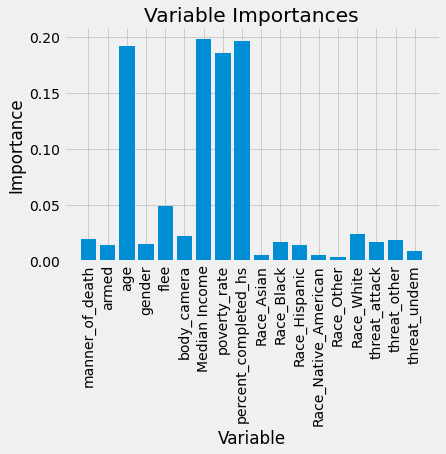

In [39]:
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');